# Pair Programming Intro Regresión Lineal

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el 

pairprgramming de codificicación (este csv debería tener las variables **estadandarizas**).

El **objetivo** de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:

- Deberéis separar la X y la y.
- Deberéis crear el train y el test.
- Ajustar vuestro modelo.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [20]:
df=pd.read_csv('data/08-primas_categorizadas_normalizadas.csv',index_col=0)
df.head()

,age,sex,bmi,children,smoker,region,charges_Sklearn,fumadores,x0_northeast,x0_northwest,x0_southeast,x0_southwest
0,-1.387916,female,-0.380152,-0.885991,yes,southwest,0.836552,1,0.0,0.0,0.0,1.0
1,-1.459488,male,0.611376,-0.069805,no,southeast,0.032037,0,0.0,0.0,1.0,0.0
2,-0.743769,male,0.481312,1.562566,no,southeast,0.176597,0,0.0,0.0,1.0,0.0
3,-0.457482,male,-0.214616,-0.885991,no,northwest,0.145677,0,0.0,1.0,0.0,0.0
4,-0.529054,female,-0.745008,-0.885991,no,southeast,0.139827,0,0.0,0.0,1.0,0.0


In [21]:
numericas = df.select_dtypes(np.number)

In [22]:
numericas.head(2)

,age,bmi,children,charges_Sklearn,fumadores,x0_northeast,x0_northwest,x0_southeast,x0_southwest
0,-1.387916,-0.380152,-0.885991,0.836552,1,0.0,0.0,0.0,1.0
1,-1.459488,0.611376,-0.069805,0.032037,0,0.0,0.0,1.0,0.0


In [23]:
X = numericas.drop(['charges_Sklearn','bmi','fumadores','x0_northeast','x0_northwest','x0_southeast','x0_southwest'], axis = 1)#predictoras
y = df["charges_Sklearn"]# respuestas

In [24]:
# comprobemos que es ahora X, deberían ser todas las columnas de las variables predictoras
X.head(3)

,age,children
0,-1.387916,-0.885991
1,-1.459488,-0.069805
2,-0.743769,1.562566


In [25]:
y.head(3)

0    0.836552
1    0.032037
2    0.176597
Name: charges_Sklearn, dtype: float64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
# iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos 
# que usaremos de nuestro ordenador. Al indicar -1 significa que los usaremos todos. 
lr = LinearRegression(n_jobs=-1)

In [28]:
# fiteamos el modelo, lo que significa que le pasamos los datos de entrenamiento para que aprenda el algoritmo. 
# Fijaros que para que aprenda, les paso solo los datos de entrenamiento
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [29]:
# es el momento de hacer las predicciones, para eso usarmos el método predict() de sklearn 

y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) # hacemos las predicciones para las casas que tenemos en los datos de test

In [30]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
72,0.483175,0.512228,Train
903,0.109029,0.201598,Train
44,0.159836,0.247686,Train
309,0.820715,0.148041,Train
788,0.345104,0.419068,Train


In [31]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
72,0.483175,0.512228,Train,-0.029052
903,0.109029,0.201598,Train,-0.092569
44,0.159836,0.247686,Train,-0.087850
309,0.820715,0.148041,Train,0.672674
788,0.345104,0.419068,Train,-0.073964


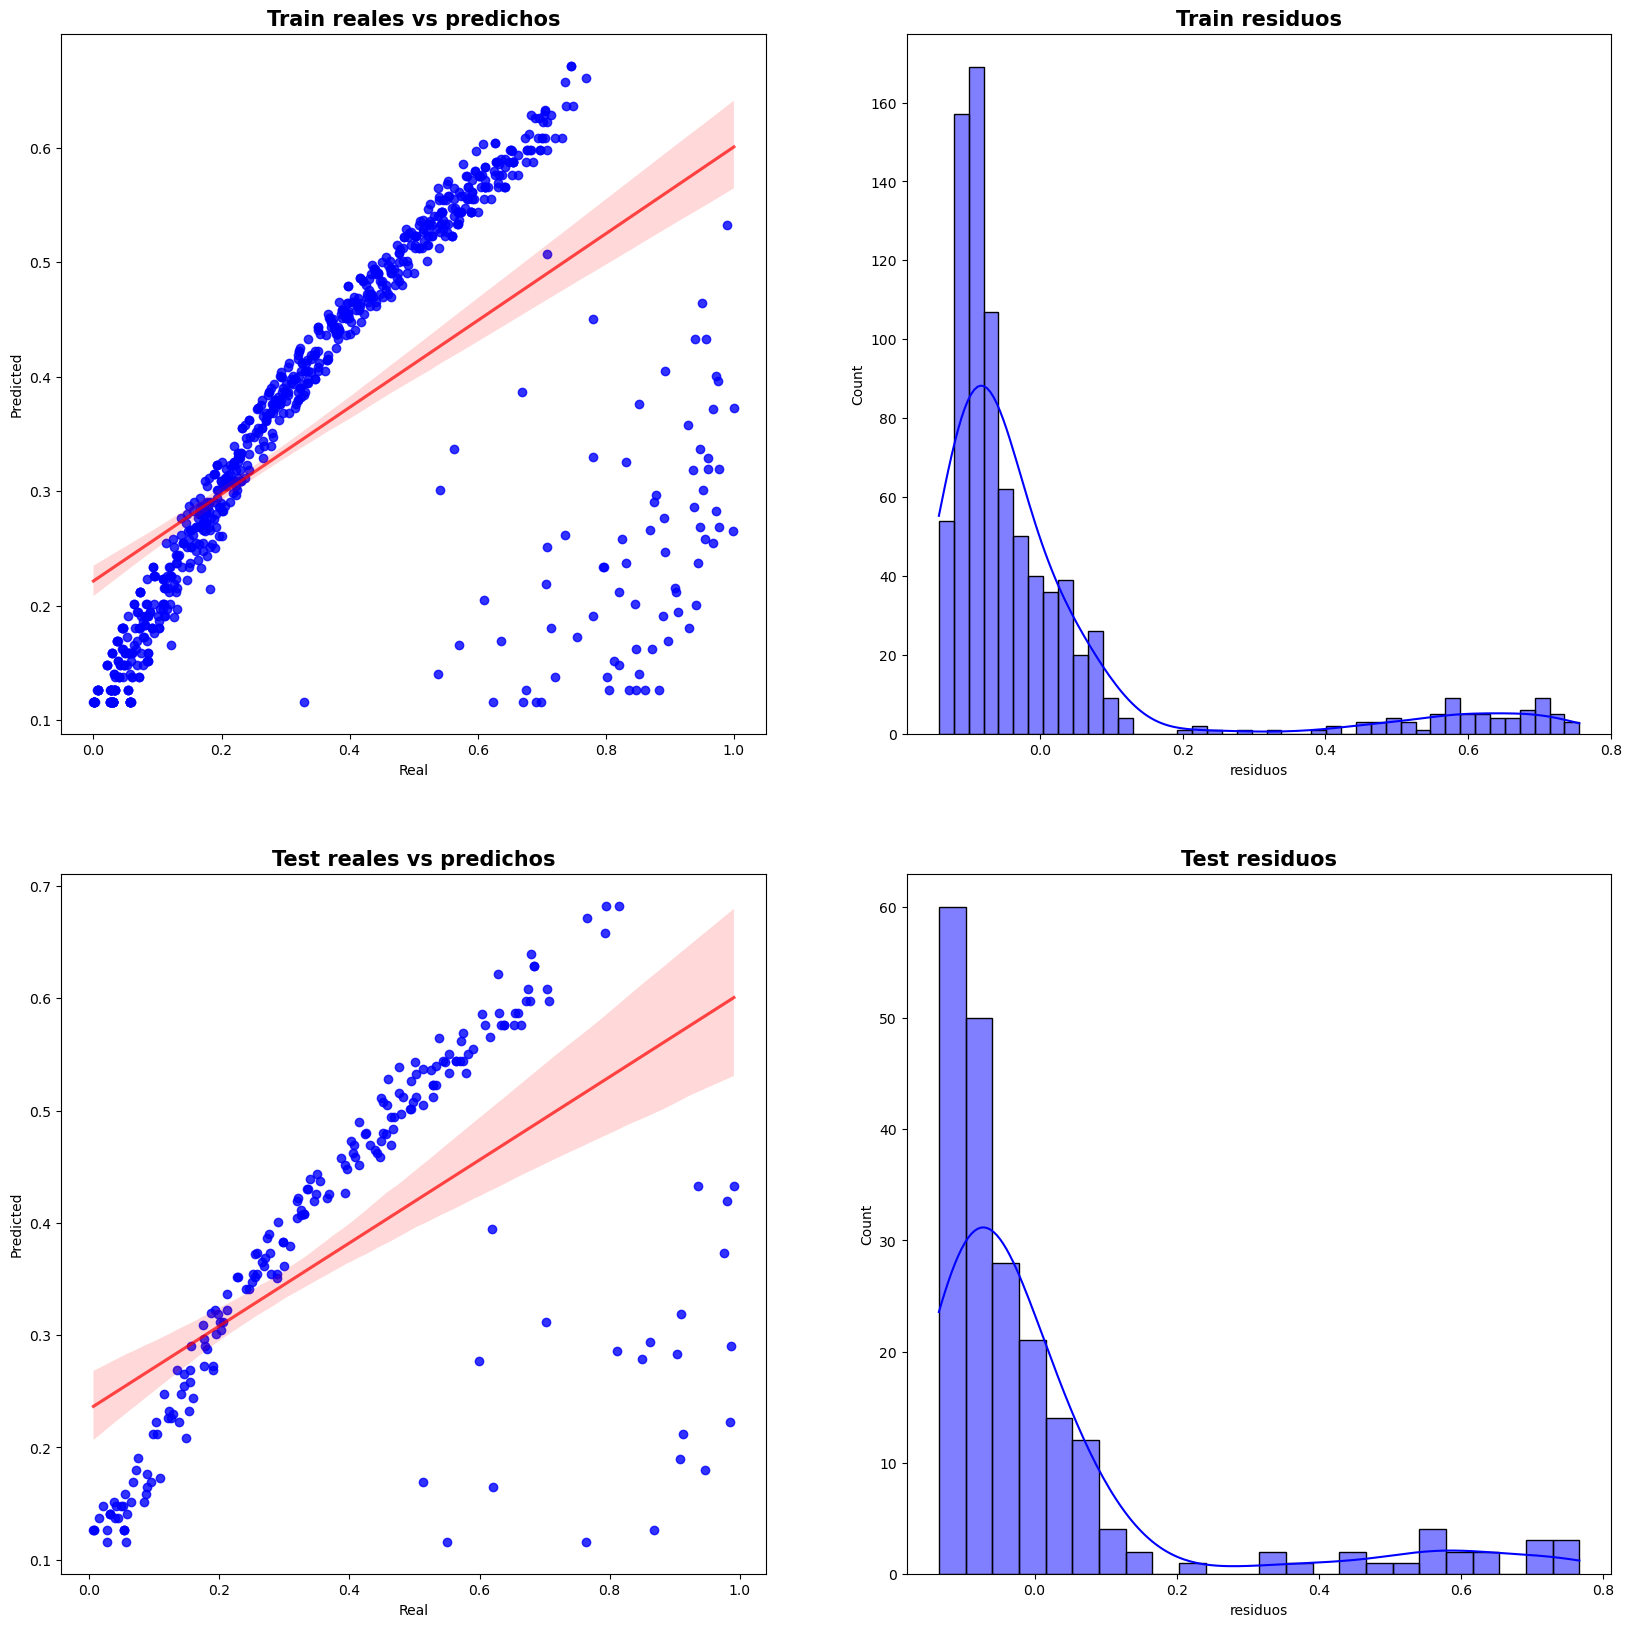

In [32]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "blue",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "blue",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="blue",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "blue",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

# Cross - Validation

In [33]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
                estimator = LinearRegression(), # que algoritmo  queremos usar para ajustar el modelo
                X         = X, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
                y         = y, # cual es nuestra variable y
                scoring   = 'neg_root_mean_squared_error', # que métrica queremos calcular
                cv        = 10 # número de veces que queremos hacer la validación
             )

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-0.19273825 -0.2072966  -0.20183179 -0.18281893 -0.16010853 -0.21303416
 -0.1632215  -0.206645   -0.22953772 -0.21015765]
Média métricas de validación cruzada: -0.1967390125687402


In [34]:
# para saber que métricas podemos usar: 

metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [35]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.029100,0.003134,0.421328,-0.192738
1,0.003026,0.003329,0.345503,-0.207297
2,0.003825,0.001739,0.305234,-0.201832
3,0.001814,0.001245,0.512787,-0.182819
4,0.002091,0.001983,0.515318,-0.160109
5,0.004663,0.001984,0.304261,-0.213034
6,0.003148,0.002631,0.564268,-0.163221
7,0.006592,0.001663,0.302854,-0.206645
8,0.001937,0.000975,0.160594,-0.229538
9,0.002580,0.001485,0.268748,-0.210158


In [36]:
# calculamos la media para cada una de las métricas

print(f'la media para el r2 es {cv_scores["test_r2"].mean().round(2)}')
print(f'la media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean()).round(2)}')

la media para el r2 es 0.37
la media para el RMSE es 0.2
